In [77]:
#!/usr/bin/python

"""
    Starter code for the regression mini-project.
    
    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble point that you'll find yourself in the outliers mini-project).

    Draws a little scatterplot of the training/testing data

    You fill in the regression code where indicated:
"""    


import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "rb") )

import matplotlib.pyplot as plt

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split               #from sklearn.cross_validation import train_test_split

In [78]:
# Converting the given pickled Enron data to a pandas dataframe
import pandas as pd
enron_df = pd.DataFrame.from_records(list(dictionary.values()))
enron_df.head()

# set the index of df to be the employees series:
employees = pd.Series(list(dictionary.keys()))
enron_df.set_index(employees, inplace=True)
enron_df.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
METTS MARK,365788,807,NaN,1061827,NaN,600000,mark.metts@enron.com,NaN,NaN,585062,...,38,NaN,29,1740,1,False,NaN,702,585062,NaN
BAXTER JOHN C,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,...,NaN,6680544,NaN,2660303,NaN,False,1586055,NaN,3942714,NaN
ELLIOTT STEVEN,170941,NaN,NaN,211725,NaN,350000,steven.elliott@enron.com,NaN,-400729,6678735,...,NaN,4890344,NaN,12961,NaN,False,NaN,NaN,1788391,NaN
CORDES WILLIAM R,NaN,764,NaN,NaN,NaN,NaN,bill.cordes@enron.com,NaN,NaN,1038185,...,10,651850,12,NaN,0,False,NaN,58,386335,NaN
HANNON KEVIN P,243293,1045,NaN,288682,NaN,1500000,kevin.hannon@enron.com,NaN,-3117011,6391065,...,32,5538001,32,11350,21,True,1617011,1035,853064,NaN


In [106]:
enron_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, METTS MARK to GLISAN JR BEN F
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   salary                     143 non-null    object
 1   to_messages                143 non-null    object
 2   deferral_payments          143 non-null    object
 3   total_payments             143 non-null    object
 4   loan_advances              143 non-null    object
 5   bonus                      143 non-null    object
 6   email_address              143 non-null    object
 7   restricted_stock_deferred  143 non-null    object
 8   deferred_income            143 non-null    object
 9   total_stock_value          142 non-null    object
 10  expenses                   143 non-null    object
 11  from_poi_to_this_person    143 non-null    object
 12  exercised_stock_options    143 non-null    object
 13  from_messages              143 non-null    object

In [79]:
# Coerce numeric values into floats or ints; also change NaN to zero:
enron_df_new = enron_df.apply(lambda x : pd.to_numeric(x, errors = 'coerce')).copy().fillna(0)
enron_df_new.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
METTS MARK,365788.0,807.0,0.0,1061827.0,0.0,600000.0,0.0,0.0,0.0,585062.0,...,38.0,0.0,29.0,1740.0,1.0,False,0.0,702.0,585062.0,0.0
BAXTER JOHN C,267102.0,0.0,1295738.0,5634343.0,0.0,1200000.0,0.0,0.0,-1386055.0,10623258.0,...,0.0,6680544.0,0.0,2660303.0,0.0,False,1586055.0,0.0,3942714.0,0.0
ELLIOTT STEVEN,170941.0,0.0,0.0,211725.0,0.0,350000.0,0.0,0.0,-400729.0,6678735.0,...,0.0,4890344.0,0.0,12961.0,0.0,False,0.0,0.0,1788391.0,0.0
CORDES WILLIAM R,0.0,764.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1038185.0,...,10.0,651850.0,12.0,0.0,0.0,False,0.0,58.0,386335.0,0.0
HANNON KEVIN P,243293.0,1045.0,0.0,288682.0,0.0,1500000.0,0.0,0.0,-3117011.0,6391065.0,...,32.0,5538001.0,32.0,11350.0,21.0,True,1617011.0,1035.0,853064.0,0.0


In [80]:
enron_df_new.describe()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
count,1.430000e+02,143.000000,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,143.0,1.430000e+02,1.430000e+02,1.430000e+02,143.000000,143.000000,1.430000e+02,143.000000,1.430000e+02,143.000000,1.430000e+02,143.000000,1.430000e+02,143.000000
mean,1.714731e+05,1191.972028,2.222237e+05,1.489942e+06,1.678322e+04,5.926127e+05,0.0,7.393131e+04,-1.929398e+05,2.404233e+06,34719.447552,37.552448,1.715504e+06,365.118881,2.267385e+05,24.475524,3.007128e+05,676.384615,7.235235e+05,10050.111888
std,1.660404e+05,2223.860300,7.567502e+05,2.386745e+06,1.703294e+05,1.036924e+06,0.0,1.306545e+06,6.080753e+05,4.422592e+06,45235.547286,74.148184,3.694149e+06,1455.675655,7.552178e+05,80.080666,6.183785e+05,1066.923179,1.571184e+06,31399.349067
min,0.000000e+00,0.000000,-1.025000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.0,-1.787380e+06,-3.504386e+06,-4.409300e+04,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,-2.604490e+06,0.000000
25%,0.000000e+00,0.000000,0.000000e+00,8.929250e+04,0.000000e+00,0.000000e+00,0.0,0.000000e+00,-3.499950e+04,2.148255e+05,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
50%,2.061210e+05,266.000000,0.000000e+00,9.114530e+05,0.000000e+00,2.500000e+05,0.0,0.000000e+00,0.000000e+00,9.543540e+05,17355.000000,1.000000,6.014380e+05,16.000000,8.910000e+02,0.000000,0.000000e+00,91.000000,3.466630e+05,0.000000
75%,2.670975e+05,1504.000000,3.980500e+03,1.858492e+06,0.000000e+00,8.000000e+05,0.0,0.000000e+00,0.000000e+00,2.217787e+06,52688.500000,39.500000,1.636136e+06,50.500000,1.492040e+05,12.500000,3.676730e+05,869.000000,6.801640e+05,0.000000
max,1.060932e+06,15149.000000,6.426990e+06,1.725253e+07,2.000000e+06,8.000000e+06,0.0,1.545629e+07,0.000000e+00,3.076606e+07,228763.000000,528.000000,3.076606e+07,14368.000000,7.427621e+06,609.000000,5.145434e+06,5521.000000,1.384707e+07,137864.000000


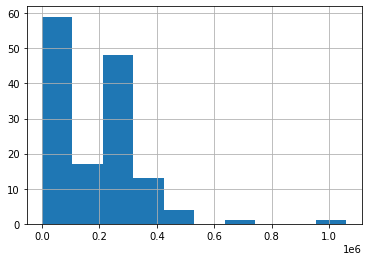

In [104]:
enron_df_new.salary.hist();

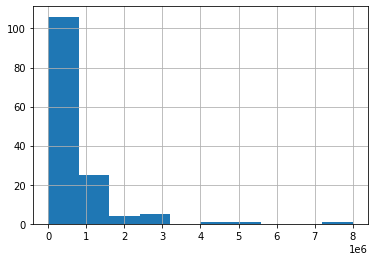

In [105]:
enron_df_new.bonus.hist();

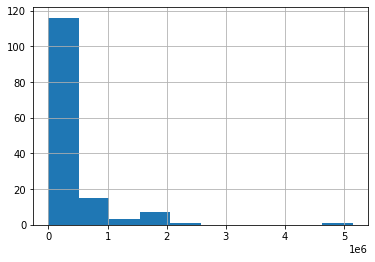

In [107]:
enron_df_new.long_term_incentive.hist();

Use regression to predict financial data for Enron employees and associates. Once you know some financial data about an employee, like their salary, __what would you predict for the size of their bonus?__  
- Target : Bonus  
- Input  : Salary

In [81]:
## list the features you want to look at--first item 
## in the list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

In [82]:
### training-testing split needed in regression, just like classification
#from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
#test_color = "b"

You will be fitting your regression using the blue (training) points only. (You may have noticed that instead of the standard 10%, we’ve put 50% of our data into the test set--that’s because in Part 5, we will switch the training and testing datasets around and splitting the data evenly makes this more straightforward.)

In [83]:
## Your regression goes here!. Please name it reg, so that the plotting code below picks it up and 
## plots it correctly. Don't forget to change the test_color above from "b" to "r" to differentiate training points from test points.

test_color = "r"
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(feature_train, target_train)

LinearRegression()

## Extracting Slope and Intercept

In [84]:
print ('Coefficients : ', reg.coef_)

Coefficients :  [1.97017287]


In [85]:
print ('Intercept : ', reg.intercept_)

Intercept :  662220.4176015807


## Regression Score: Training Data

Imagine you were a less savvy machine learner, and didn’t know to test on a holdout test set. Instead, you tested on the same data that you used to train, by comparing the regression predictions to the target values (i.e. bonuses) in the training data. What score do you find? You may not have an intuition yet for what a “good” score is; this score isn’t very good (but it could be a lot worse).

In [86]:
print ('R-squared value on training data : ', reg.score(feature_train, target_train))

R-squared value on training data :  0.04164573226747781


## Regression Score: Test Data

Now compute the score for your regression on the test data, like you know you should. What’s that score on the testing data?

In [87]:
print ('R-squared value on testing data : ', reg.score(feature_test, target_test))

R-squared value on testing data :  -0.04471207836147806


In [123]:
reg.predict(feature_test)

array([1546919.17211633, 1357593.06855529, 1874705.60034882,
       1656433.07094976, 1023518.26251928, 4057996.75363721,
       1229048.30346257,  466303.11655559,  407112.81343515,
        393435.11819008, 2052276.50971014, 2557723.81656469,
       2846269.44144046, 4339846.771424  , 1542198.15353944,
        951201.91777885, 4314963.16799216, 2198942.97800621,
       1546919.17211633,  880635.23839867, 1118116.20496637,
        525493.41967603, 1058206.14775998, 5048532.27068501,
        656303.9895722 , 1213656.45703913,  643874.02591691,
       2536289.82399872])

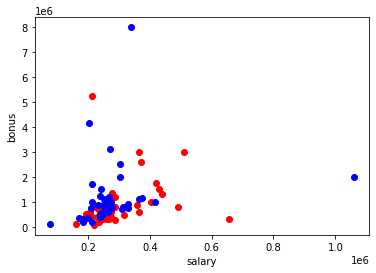

In [88]:
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color) 

for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color )
plt.xlabel('salary')
plt.ylabel('bonus');


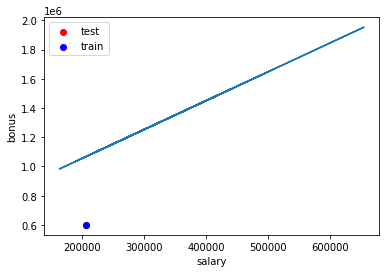

In [89]:
### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")

try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass

plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

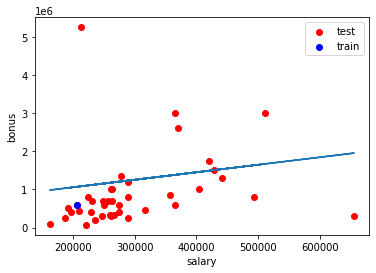

In [90]:
### labels for the legend
plt.scatter(feature_test, target_test, color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")

try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass

plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

 You might notice a few data points that fall outside the main trend, someone who gets a high salary (over a million dollars!) but a relatively small bonus. This is an example of an outlier.
 
As things stand right now, this point falls into the test set (and probably hurting the score on our test data as a result). 

 Let’s add a little hack to see what happens if it falls in the training set instead. Add these two lines near the bottom of ```finance_regression.py```, i.e., right before ```plt.xlabel(features_list[1])```:
 
 > reg.fit(feature_test, target_test)  
plt.plot(feature_train, reg.predict(feature_train), color="b") 

## Sneak Peek: Outliers Break Regressions

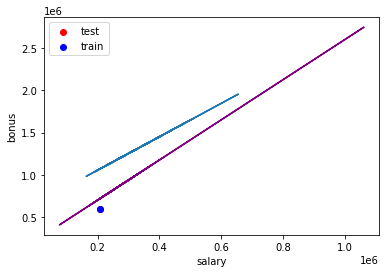

In [91]:
### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")

try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass

reg.fit(feature_test, target_test)
plt.plot(feature_train, reg.predict(feature_train), color="purple")                   #  bepaalt regression line obv trainingdata
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

In [117]:
print ('Coefficients : ', reg.coef_)

Coefficients :  [2.36761212]


Now we’ll be drawing two regression lines, one fit on the test data (with outlier) and one fit on the training data (no outlier, purple line). Look at the plot now--big difference, huh? That single outlier is driving most of the difference.  

What’s the slope of the new regression line?

In [92]:
reg.coef_

array([2.36761212])

The slope is about 2.27 after removing the outlier, which is a big difference from what we had before (about 5.4).  A small number of outliers makes a big difference!

From Python 3.3 forward, a change to the order in which dictionary keys are processed was made such that the orders are randomized each time the code is run. This will cause some compatibility problems with the graders and project code, which were run under Python 2.7. To correct for this, add the following argument to the __featureFormat__ call on line 26 of __finance_regression.py__

> sort_keys = '../tools/python2_lesson06_keys.pkl'

This will open up a file in the tools folder with the Python 2 key order.

## Regressing Bonus Against LTI(long term incentive)

There are lots of finance features available, some of which might be more powerful than others in terms of predicting a person’s bonus. For example, suppose you thought about the data a bit and guess that the “long_term_incentive” feature, which is supposed to reward employees for contributing to the long-term health of the company, might be more closely related to a person’s bonus than their salary is.

A way to confirm that you’re right in this hypothesis is to regress the bonus against the long term incentive, and see if the regression score is significantly higher than regressing the bonus against the salary. Perform the regression of bonus against long term incentive--what’s the score on the test data?

In [108]:
### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", 'long_term_incentive']
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

In [109]:
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"

test_color = "r"
reg2 = LinearRegression()
reg2.fit(feature_train, target_train)

LinearRegression()

## Extracting Slope and Intercept

In [110]:
print ('Coefficients : ', reg2.coef_)

Coefficients :  [0.2671367]


In [111]:
print ('Intercept : ', reg2.intercept_)

Intercept :  1044304.0637582359


## Regression Score (on test data)

In [112]:
print ('R-squared value on testing data : ', reg2.score(feature_test, target_test))

R-squared value on testing data :  0.10891175736247383


#### We have a better score when using long-term incentive to predict someone's bonus (as compared to salary), which translates to a better fit.

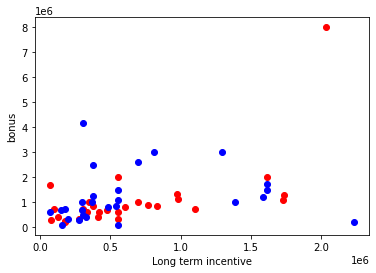

In [114]:
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 

for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color )
    
plt.xlabel('Long term incentive')
plt.ylabel('bonus');

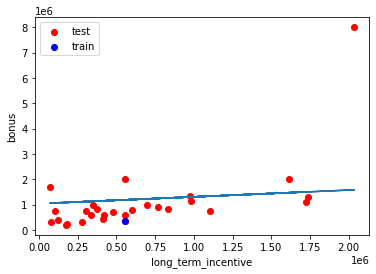

In [116]:
### labels for the legend
plt.scatter(feature_test, target_test, color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")

try:
    plt.plot( feature_test, reg2.predict(feature_test) )
except NameError:
    pass

plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()